# Read me first - you do not need to run this
This notebook contains the code for the dataset.

As you will see, the dataset is a block of code that feeds the data one image at a time to the model.

However, when we use this code for our model, we will use a copy stored in the mnist_dataset.py (as opposed to mnist_dataset.ipynb) file. That means that we can simply import it with a single command, which is much neater.

However, running this notebook explains how the code works, which I hope will be useful to you.  It also gives a worked example of a Python class.

The first thing that we need to do is import the python libraries that we're going to use. This is usually the first part of any script.

In [1]:
from typing import Dict
from pathlib import Path
import pandas as pd
import torch
from torch.utils.data import Dataset
from torchvision.io import read_image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

We have split our data into 'train' and 'test'.

In each of these, we have two basic things:
- A load of png files, each with a drawing of a single digit on it.
- A csv file that says which digit each file is showing. Let's have a look!

The following cell establishes where the data is stored.

There is a folder '../data' that contains all of the images

Underneath that, there is a folder 'test' that contains all of the test images.

The use of Path just helps us write neater code. You can use this is a template. If you need to google it, google 'pathlib Path' for the full info.

In [2]:
data_root = Path('../data')
test_dir = data_root / 'test'
str(test_dir)


'..\\data\\test'

Now that we know where the data is stored, we also need to read in our csv file, which tells us which png file corresponds to which digit.

For this, we use pandas (here shortened to pd).

Pandas is Python's library for dealing with tables of information. It's very powerful and can be fiddly to use. However, we'll try to keep it very simple. Here, ```pd.read_csv```
 will load the csv file that we saved into a table that we can then read and play with. 

In [3]:
test_df = pd.read_csv(test_dir / 'test.csv')
test_df.head()

,png,label
0,0.png,7
1,1.png,2
2,2.png,1
3,3.png,0
4,4.png,4


What this table tells us is that the file ```0.png``` is a picture of the number 7.

Because we're grown-ups, we'll write a function to display the image from a particular file. This is the function below.

In [4]:
def display_png(directory: Path, filename: str) -> None:
    """
    Given a directory path and a filename, reads in the PNG file and displays it using Matplotlib.

    Args:
        directory (Path): The directory containing the PNG file.
        filename (str): The name of the PNG file to display.

    Returns:
        None
    """
    # Construct the full path to the PNG file
    file_path = directory / filename

    # Read in the PNG file using Matplotlib
    img = mpimg.imread(str(file_path))

    # Display the PNG file using Matplotlib
    plt.imshow(img)
    plt.axis('off')
    plt.show()

Let's try it with our test directory and our first file, ``0.png``.

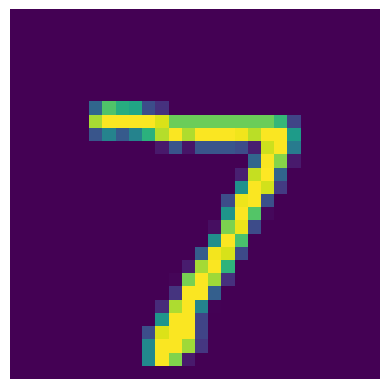

In [5]:
display_png(test_dir, '0.png')

As the csv file told us, the file '0.png' is a picture of the number 7.

# Prepare a dataset

The library that we are using to do our machine learning is called ``pytorch``. It is very powerful and is the most popular machine learning library today.

Pytorch comes with something called a _Dataset_. This is some code that is already written that we can add to.  When we do that, we are able to make use of a load of code that is already in Pytorch, which takes care of things without our having to think about them.

So, the next step is going to be to prepare a dataset.

The following code is a class. There is an explanation for how the class runs below.

In [6]:
class MnistDataset(Dataset):
    """
    A custom PyTorch dataset class for loading the MNIST dataset.

    The dataset expects to find a directory under data_root called 'train' or 'test'.
    This will contain the train or the test data.

    The dataset also expects to find a file called 'train.csv' or 'test.csv' in the
    specified data directory.
        The 'train.csv' or 'test.csv' file should contain a column called 'png' that contains
        the name of each image file in the dataset.
        The 'train.csv' or 'test.csv' should also contain a column called 'label'
        that contains the correct label for each image in the dataset.


    Args:
        data_root (Path or str): The root directory containing the dataset.
        mode (str): The mode of the dataset (either 'train' or 'test').

    Attributes:
        data_path (Path): The path to the directory for this dataset (the train or the test dataset).
        image_info (pd.DataFrame): A Pandas DataFrame containing information about the images in the dataset.

    Methods:
        __len__: Returns the number of images in the dataset.
        __getitem__: Returns the image and label data for the specified index.

    Examples:
        train_dataset = MnistDataset('/data/mnist_data', 'train')
        len(train_dataset)
            [returns the length of the dataset]
        train_dataset[0]
            [returns the image and label data for the first image in the dataset]
    """

    def __init__(self, data_root: Path, mode: str) -> None:
        """
        Initializes a new instance of the MnistDataset class.

        Args:
            data_root (Path or str): The root directory containing the dataset.
            mode (Path): The mode of the dataset (either 'train' or 'test').
        """
        data_root = Path(data_root) # If data_root is a string, convert it to a Path object
        self.data_path = data_root / mode
        self.image_info = pd.read_csv(self.data_path / f'{mode}.csv')

    def __len__(self) -> int:
        """
        Returns the number of images in the dataset.

        Returns:
            int: The number of images in the dataset.
        """
        return len(self.image_info)

    def __getitem__(self, idx: int) -> Dict[str, torch.Tensor]:
        """
        Returns the image and label data for the specified index.

        Args:
            idx (int): The index of the image to retrieve.

        Returns:
            Dict[str, torch.Tensor]: A dictionary containing the image and label data.
        """
        row = self.image_info.iloc[idx]
        image = read_image(str(self.data_path / row.png)) / 255.0
        label = torch.tensor(row.label, dtype=torch.long)
        return {'x': image, 'Y': label}

Let's break down the Python class principles, using this class as an example:

# Python Class Principles Explained

In Python, a class is like a blueprint for creating objects. Think of it as a template for things you want to model in your code. Here's how the class `MnistDataset` works:

1. **Class Declaration**:

   ```python
   class MnistDataset(Dataset):
   ```
   - This line declares a class named `MnistDataset`. It's like giving a name to a new type of thing you want to work with.
   - The `(Dataset)` part means that `MnistDataset` is based on or "inherits" some abilities from another class called `Dataset`.

2. **Class Documentation**:

   ```python
   """
   A custom PyTorch dataset class for loading the MNIST dataset.

   Args:
       data_root (Path): The root directory containing the dataset.
       mode (Path): The mode of the dataset (either 'train' or 'test').

   Attributes:
       data_path (Path): The path to the mode directory.
       image_info (pd.DataFrame): A Pandas DataFrame containing information about the images in the dataset.
   """
   ```
   - This is a block of comments inside triple quotes. It's like an instruction manual for how to use the `MnistDataset` class.
   - It explains what the class does, what information you need to provide when using it, and what kind of things it can do.

3. **Constructor (`__init__` method)**:

   ```python
   def __init__(self, data_root: Path, mode: str) -> None:
   ```
   - The `__init__` method is like a special function that runs when you create a new `MnistDataset` object. It sets up the initial state of the object.

   - It takes two things:
     - `data_root` is the folder where the dataset is stored (a directory).
     - `mode` is whether you want the training or test part of the dataset (it can be 'train' or 'test').

4. **Attributes**:

   - The class has two attributes (variables that belong to the class):
     - `data_path`: This stores the path to the dataset's folder.
     - `image_info`: This stores information about the images in the dataset, like a table of data.

   - When you create an `MnistDataset` object, it sets these attributes to the right values based on `data_root` and `mode`.

5. **Methods (`__len__` and `__getitem__`)**:

   - A class can have functions, and here, we have two of them.

   - `__len__` method:
     - It tells you how many images are in the dataset. So if you want to know how big the dataset is, you can ask this method.
   
   - `__getitem__` method:
     - This helps you get one image and its label from the dataset. You give it an index (a number), and it gives you the image and label.

In a nutshell, classes are like blueprints for making objects. They group together data and functions that work with that data. The `MnistDataset` class, for example, helps you manage the MNIST dataset by storing info about where the data is, how big it is, and how to get specific images and labels. It makes your code more organized and easier to work with.

So how do we use this class? First, we _instantiate_ it. That is, we create a new object that is a single instance of this class.

In [7]:
test_ds = MnistDataset(data_root, 'test')


Then we can use it. The following code gets the first datapoint from our class, the zeroth datapoint.

In [8]:
first_data_point = test_ds[0]

This datapoint contains a dict (google this if you don't know what one is!) with two keys:

- x is the input data (the image)
- Y is the correct label for that image.

In [9]:
first_data_point.keys()

dict_keys(['x', 'Y'])

And, if we look at what's in one of those keys, we get the data.

In [10]:
first_data_point['Y'] # the correct label for this image is 7

tensor(7)

In [11]:
first_data_point['x'] # the image data for this image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

Depending on the size of your screen, you  might even be able to spot that this datapoint contains a number 7.